## Importing Libraries and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objects as go
import plotly.offline as py

#machine learning libraries 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression 
#clc pred
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Cleaning 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
print("There are ",len(df[df.duplicated()])," row duplicated")
print("Percentage of duplicated rows: ",len(df[df.duplicated()])/len(df)*100, " %")

There are  0  row duplicated
Percentage of duplicated rows:  0.0  %


In [7]:
df.shape

(768, 9)

In [8]:
df.describe().style.format("{:.2f}")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [9]:
unknown_nan = df.isnull().sum(axis=1)
print("Number of unknown (NaN) values in each row:")
print(unknown_nan)
unknown_data = df.isnull().sum(axis=1) + df.isin(['Unknown']).sum(axis=1)
print("\nNumber of unknown (NaN + 'Unknown') values in each row:")
print(unknown_data)

Number of unknown (NaN) values in each row:
0      0
1      0
2      0
3      0
4      0
      ..
763    0
764    0
765    0
766    0
767    0
Length: 768, dtype: int64

Number of unknown (NaN + 'Unknown') values in each row:
0      0
1      0
2      0
3      0
4      0
      ..
763    0
764    0
765    0
766    0
767    0
Length: 768, dtype: int64


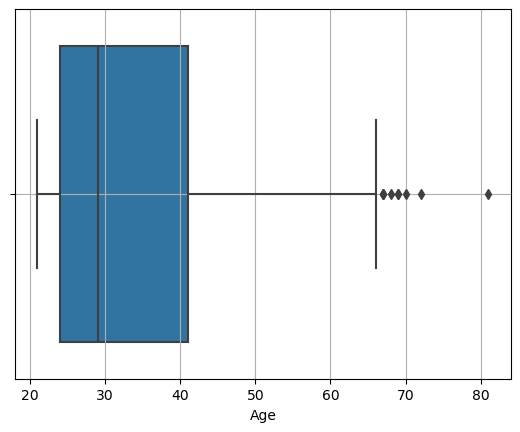

In [10]:
sns.boxplot(x=df['Age'])
plt.grid(True)
plt.show()

In [11]:
age_25th_percentile = df['Age'].quantile(0.25)
age_75th_percentile = df['Age'].quantile(0.75)
age_IQR = age_75th_percentile - age_25th_percentile
print(age_IQR)

17.0


### Data visualization

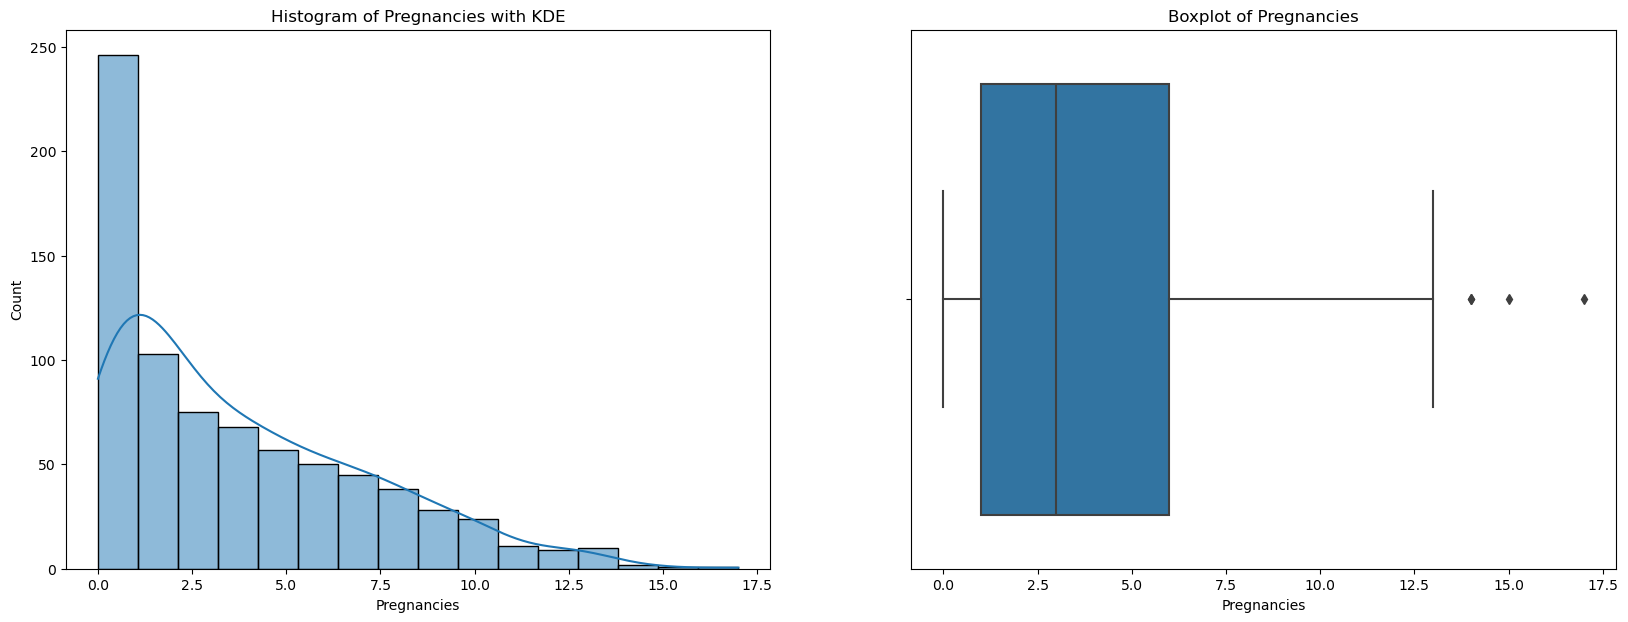

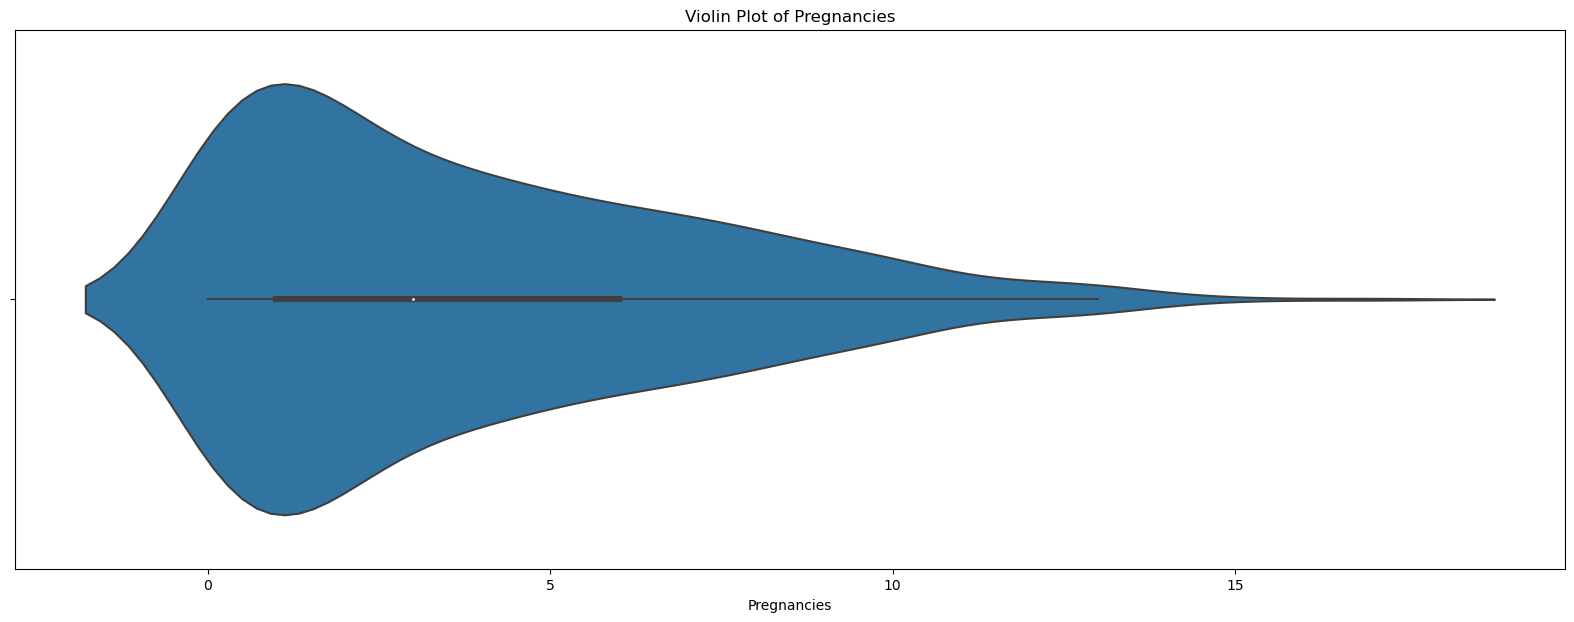

In [14]:
#Analysis of Pregnancies
fig1, ax1 = plt.subplots(1, 2, figsize=(20, 7))
sns.histplot(data=df, x="Pregnancies", kde=True, ax=ax1[0])
ax1[0].set_title('Histogram of Pregnancies with KDE')
sns.boxplot(data=df, x="Pregnancies", ax=ax1[1])
ax1[1].set_title('Boxplot of Pregnancies')

fig2, ax2 = plt.subplots(figsize=(20, 7))
sns.violinplot(data=df, x="Pregnancies", ax=ax2)
ax2.set_title('Violin Plot of Pregnancies') 

plt.show()

In [15]:
print("Median of Pregnancies: ", df["Pregnancies"].median())
print("Maximum of Pregnancies: ", df["Pregnancies"].max())

Median of Pregnancies:  3.0
Maximum of Pregnancies:  17


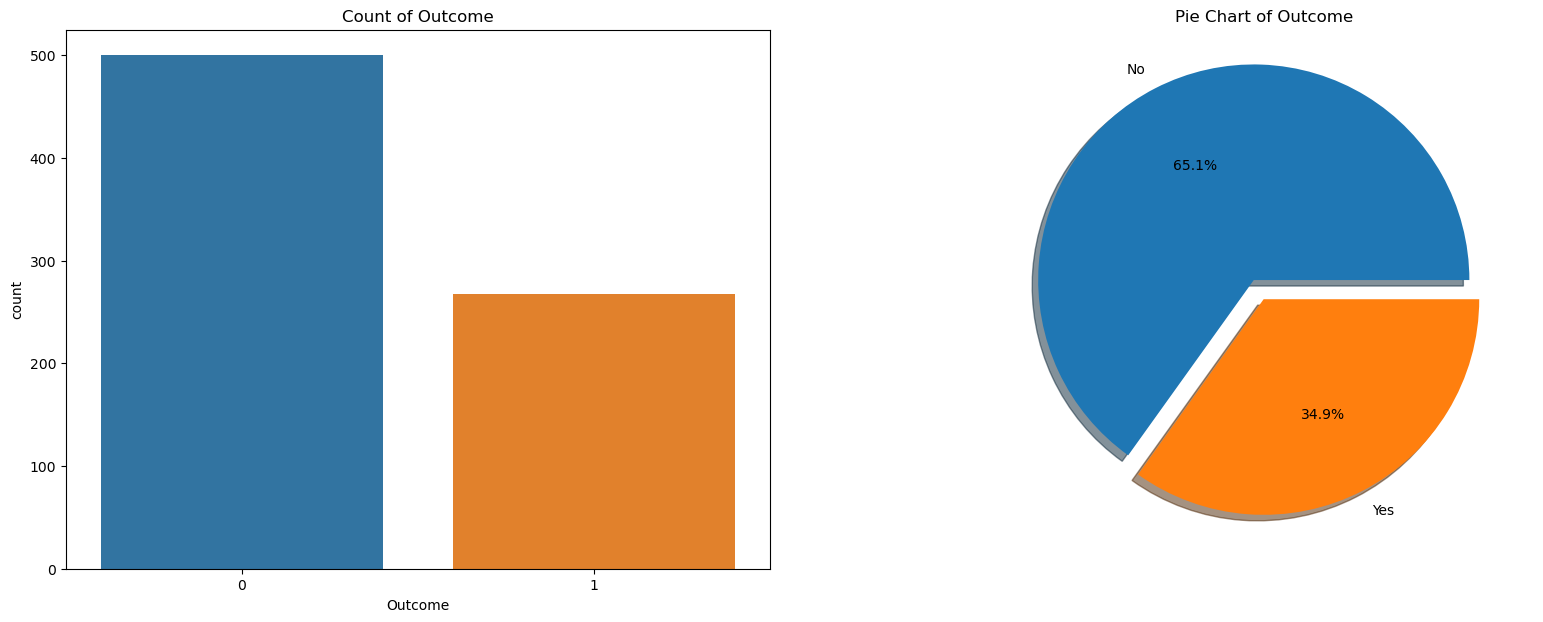

In [16]:
#Analysis of Outcome
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
sns.countplot(data=df, x="Outcome", ax=ax[0])
ax[0].set_title('Count of Outcome')
df["Outcome"].value_counts().plot.pie(
    explode=[0.1, 0],
    autopct="%1.1f%%",
    labels=["No", "Yes"],
    shadow=True,
    ax=ax[1]
)
ax[1].set_ylabel('')
ax[1].set_title('Pie Chart of Outcome')
plt.show()

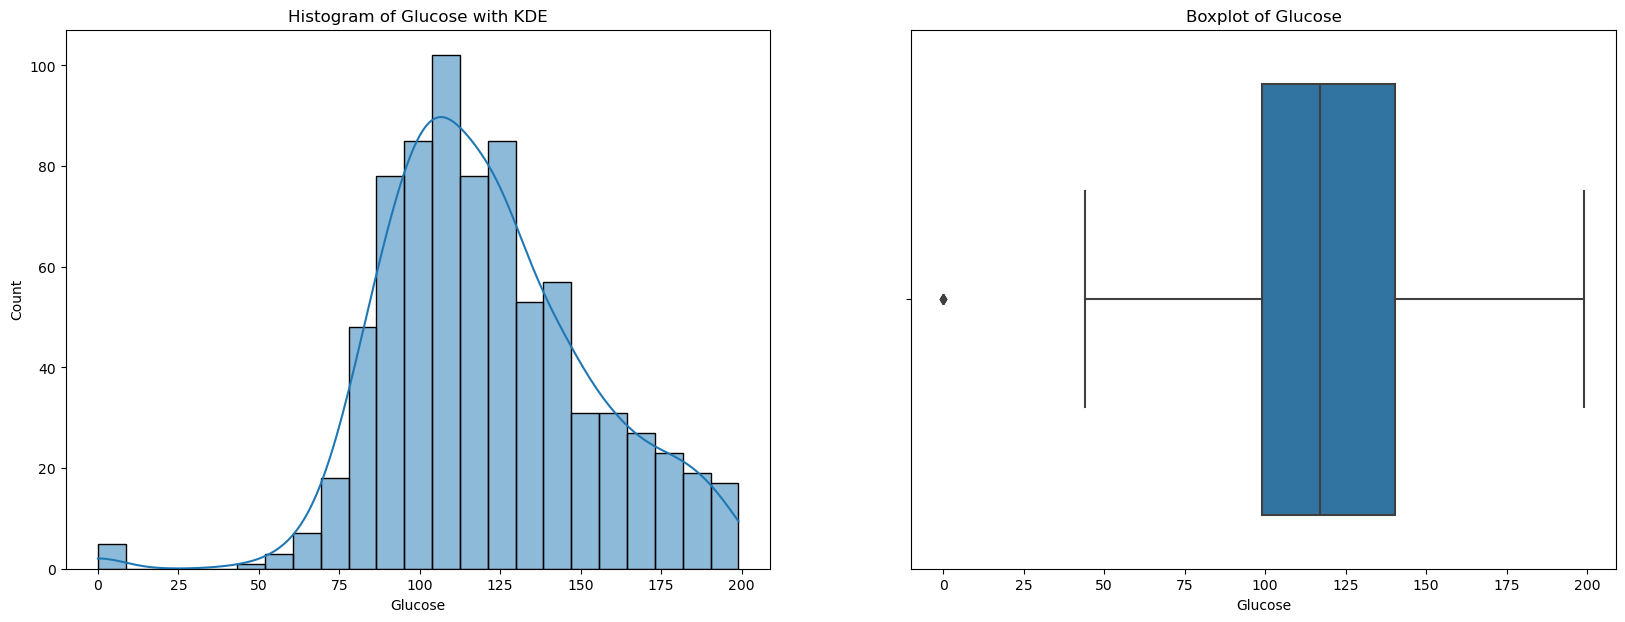

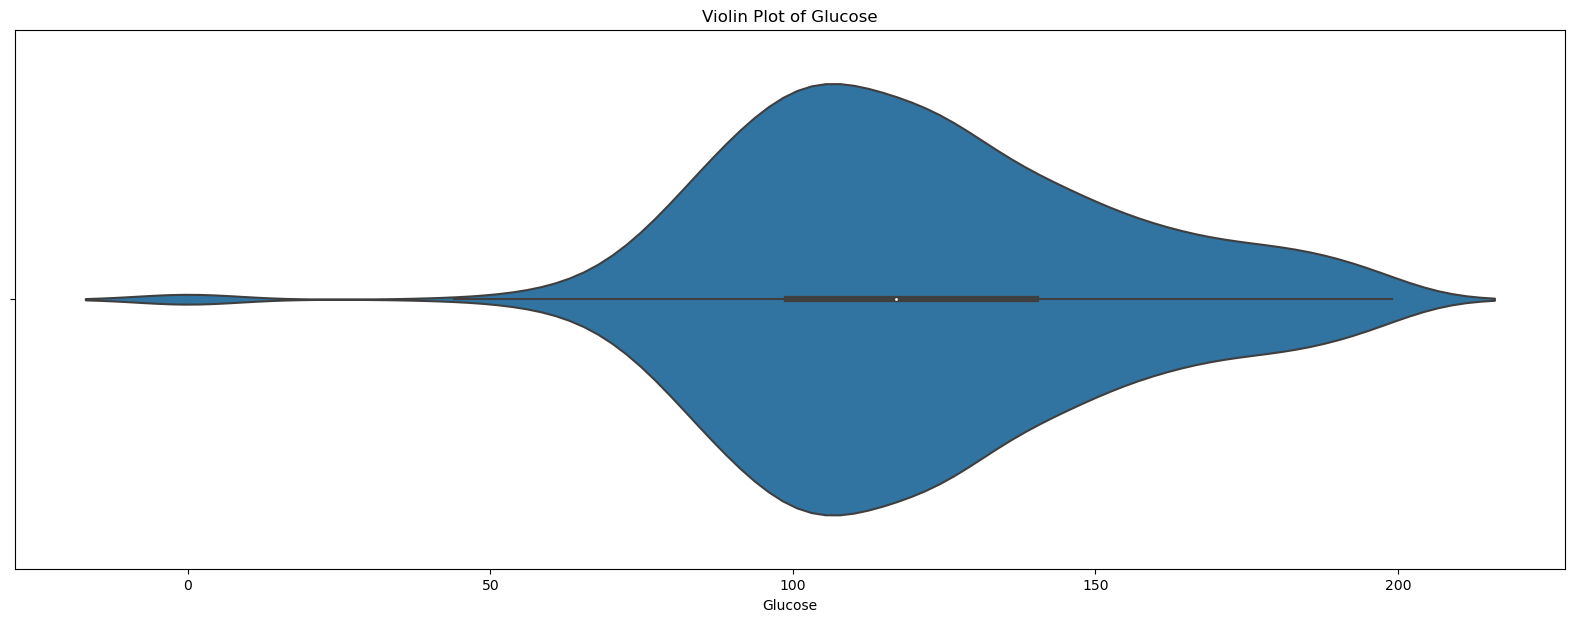

In [17]:
#Analysis of Glucose
fig3, ax3 = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(data=df, x="Glucose", kde=True, ax=ax3[0])
ax3[0].set_title('Histogram of Glucose with KDE')
sns.boxplot(data=df, x="Glucose", ax=ax3[1])
ax3[1].set_title('Boxplot of Glucose') 
fig4, ax4 = plt.subplots(figsize=(20, 7))
sns.violinplot(data=df, x="Glucose", ax=ax4)
ax4.set_title('Violin Plot of Glucose')
plt.show()

In [18]:
print("Median of Glucose: ", df["Glucose"].median())
print("Maximum of Glucose: ", df["Glucose"].max())
print("Mean of Glucose: ", df["Glucose"].mean())

Median of Glucose:  117.0
Maximum of Glucose:  199
Mean of Glucose:  120.89453125


In [19]:
print("Rows with Glucose value of 0: ", df[df["Glucose"] == 0].shape[0])

Rows with Glucose value of 0:  5


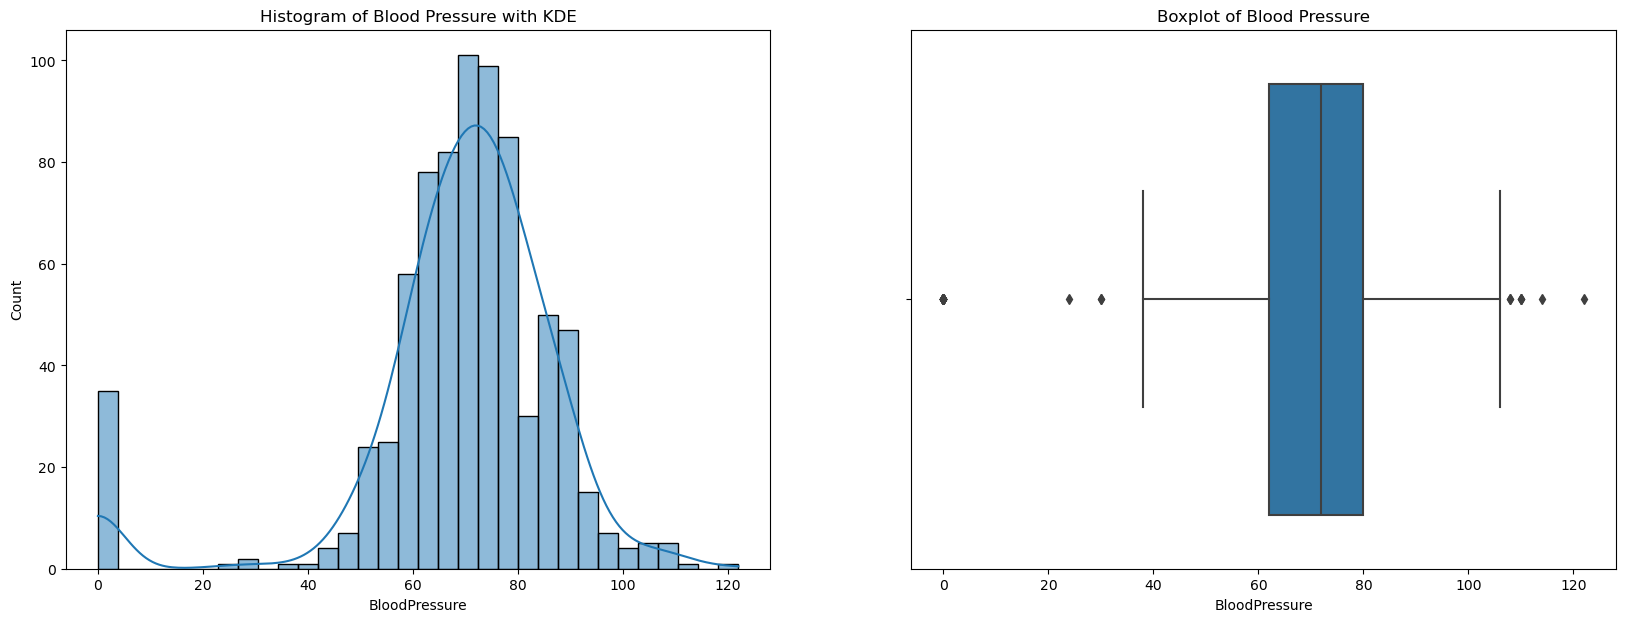

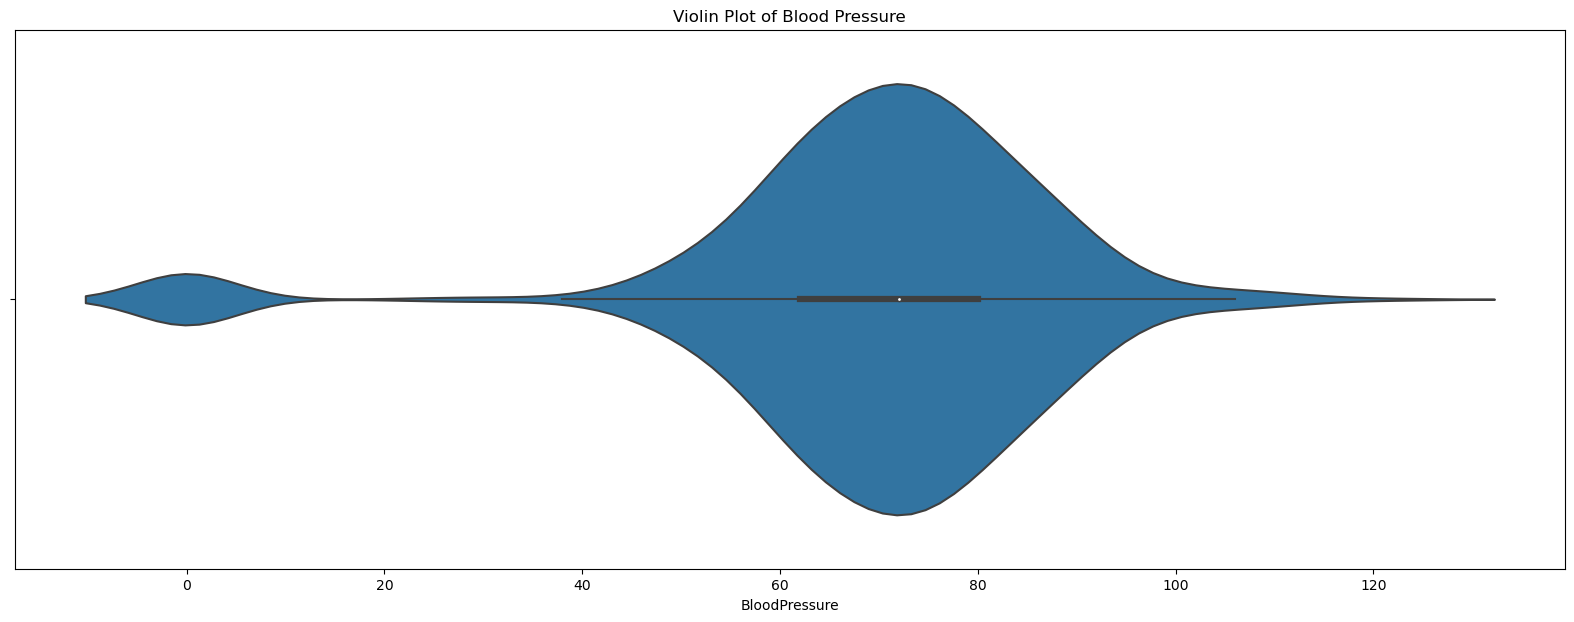

In [20]:
#Analysis of Blood Pressure
fig5, ax5 = plt.subplots(1, 2, figsize=(20, 7))
sns.histplot(data=df, x="BloodPressure", kde=True, ax=ax5[0])
ax5[0].set_title('Histogram of Blood Pressure with KDE')
sns.boxplot(data=df, x="BloodPressure", ax=ax5[1])
ax5[1].set_title('Boxplot of Blood Pressure')

fig6, ax6 = plt.subplots(figsize=(20, 7))

sns.violinplot(data=df, x="BloodPressure", ax=ax6)
ax6.set_title('Violin Plot of Blood Pressure')

plt.show()

In [21]:
print("Median of Blood Pressure: ", df["BloodPressure"].median())
print("Maximum of Blood Pressure: ", df["BloodPressure"].max())
print("Mean of Pressure: ", df["BloodPressure"].mean())

Median of Blood Pressure:  72.0
Maximum of Blood Pressure:  122
Mean of Pressure:  69.10546875


In [22]:
print("Rows with BloodPressure value of 0: ", df[df["BloodPressure"] == 0].shape[0])

Rows with BloodPressure value of 0:  35


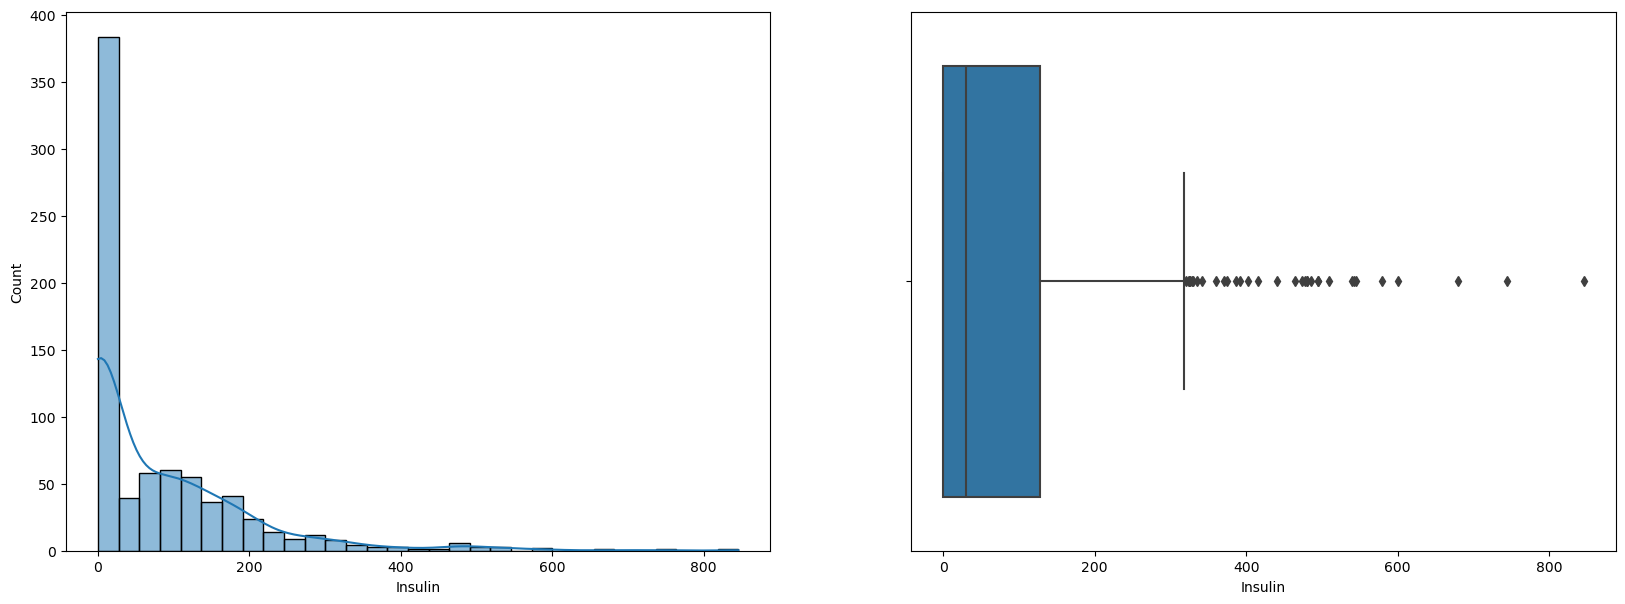

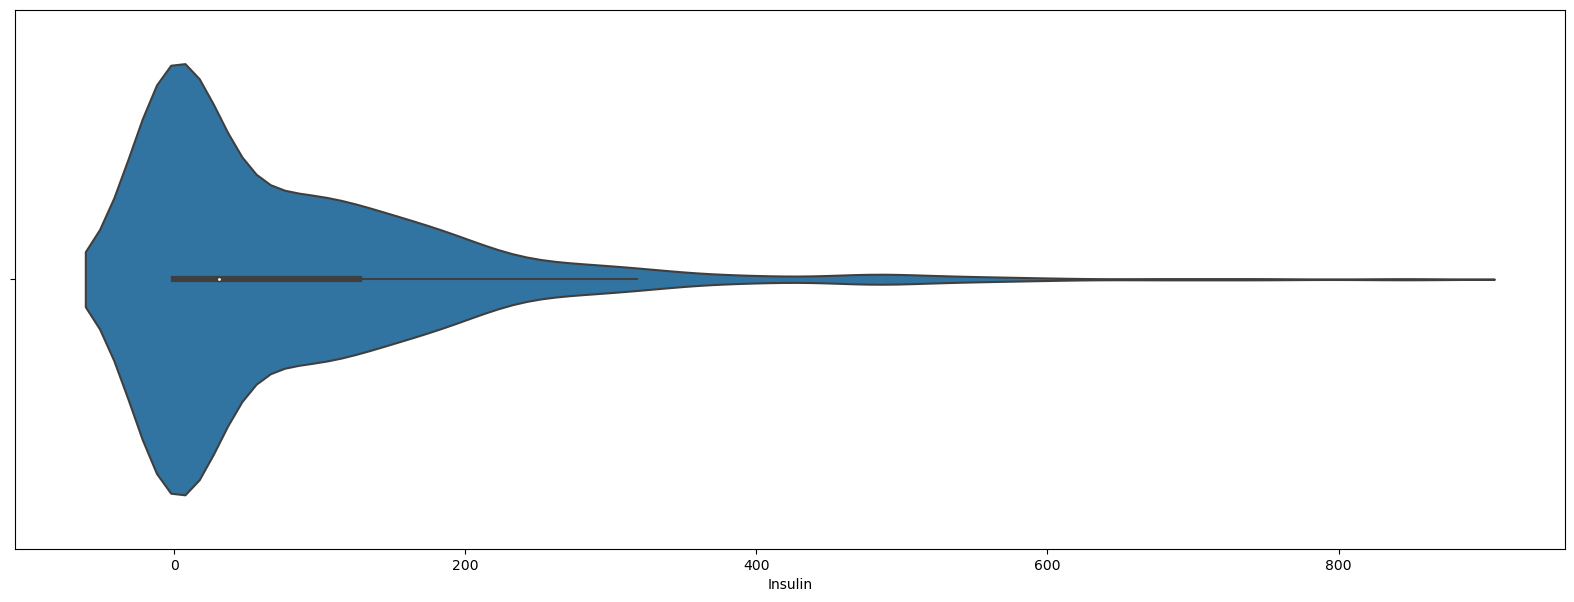

In [23]:
#Analysis of Insulin
fig7, ax7 = plt.subplots(1, 2, figsize=(20, 7))
fig8, ax8 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="Insulin", kde=True, ax=ax7[0])
sns.boxplot(data=df, x="Insulin", ax=ax7[1])

sns.violinplot(data=df, x="Insulin", ax=ax8)

plt.show()

In [24]:
print("Rows with Insulin value of 0: ", df[df["Insulin"] == 0].shape[0])

Rows with Insulin value of 0:  374


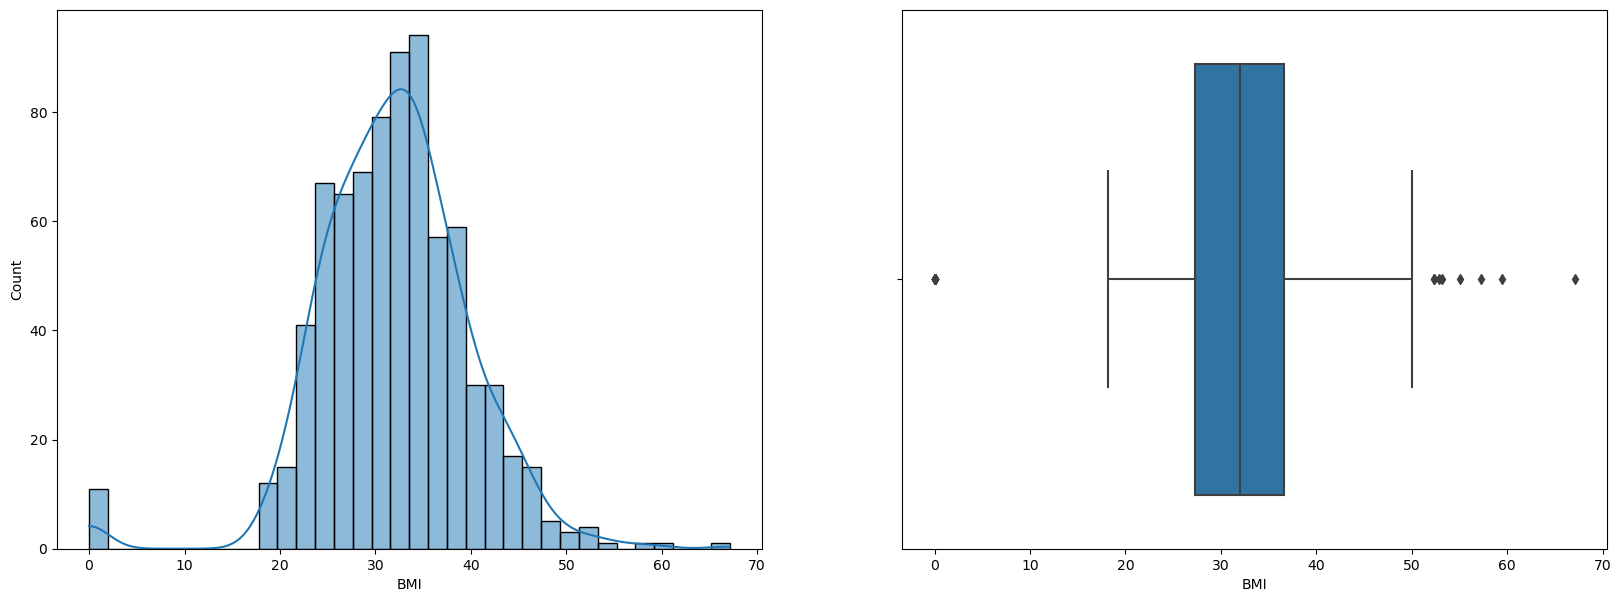

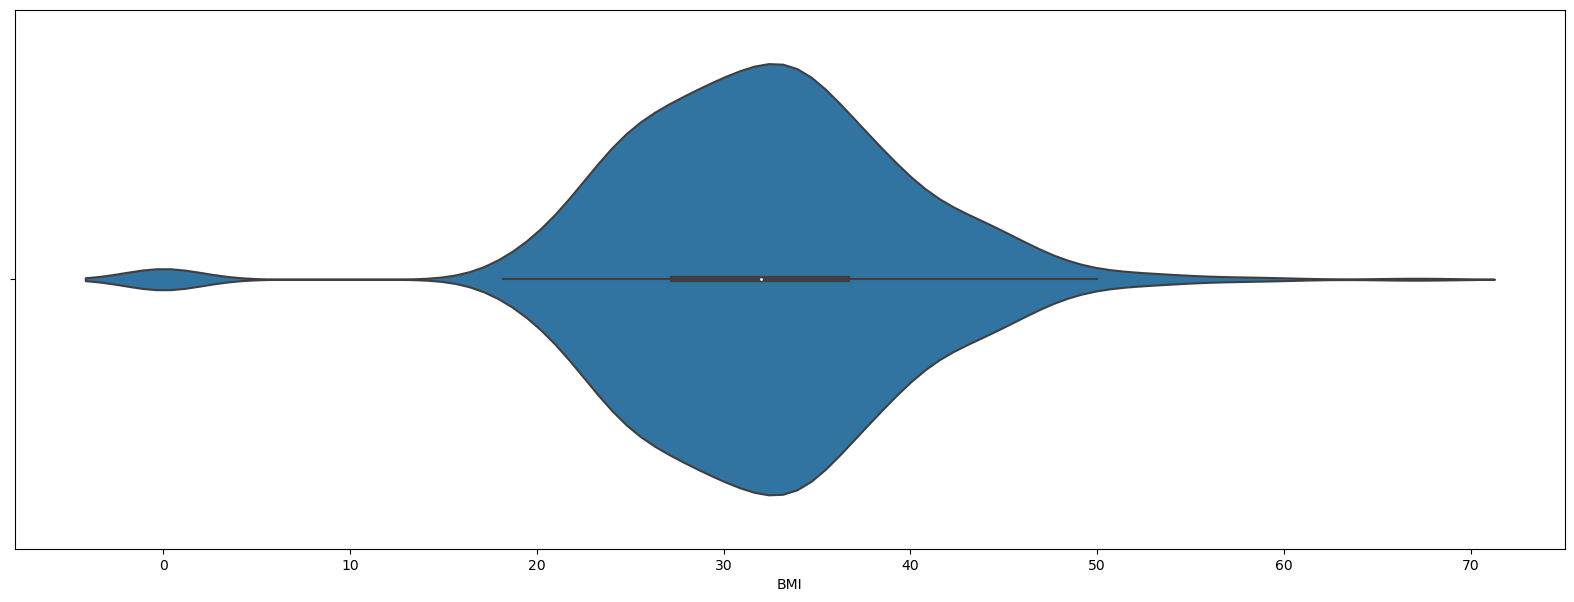

In [25]:
#Analysis of BMI
fig9, ax9 = plt.subplots(1, 2, figsize=(20, 7))
fig10, ax10 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="BMI", kde=True, ax=ax9[0])
sns.boxplot(data=df, x="BMI", ax=ax9[1])

sns.violinplot(data=df, x="BMI", ax=ax10)

plt.show()

In [26]:
print("Median of BMI: ", df["BMI"].median())
print("Maximum of BMI: ", df["BMI"].max())
print("Mean of BMI: ", df["BMI"].mean())

Median of BMI:  32.0
Maximum of BMI:  67.1
Mean of BMI:  31.992578124999998


In [27]:
print("Rows with BMI value of 0: ", df[df["BMI"] == 0].shape[0])

Rows with BMI value of 0:  11


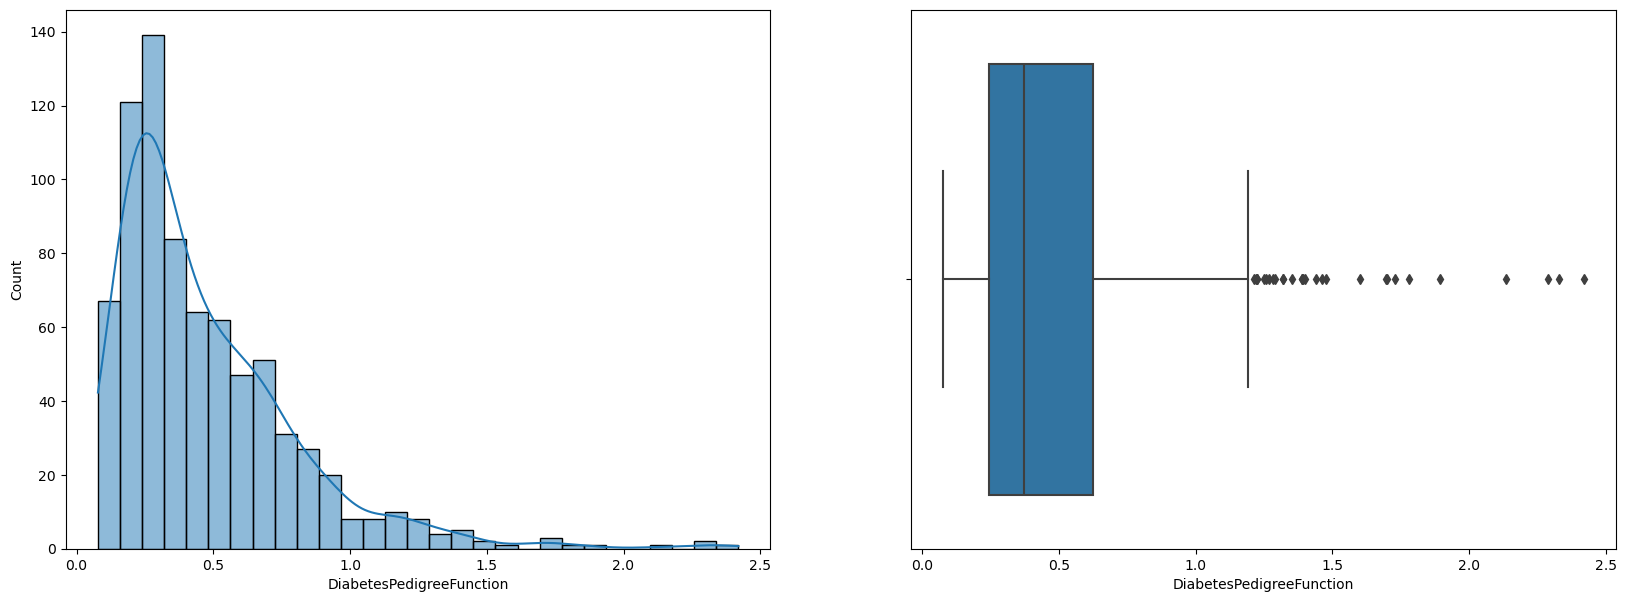

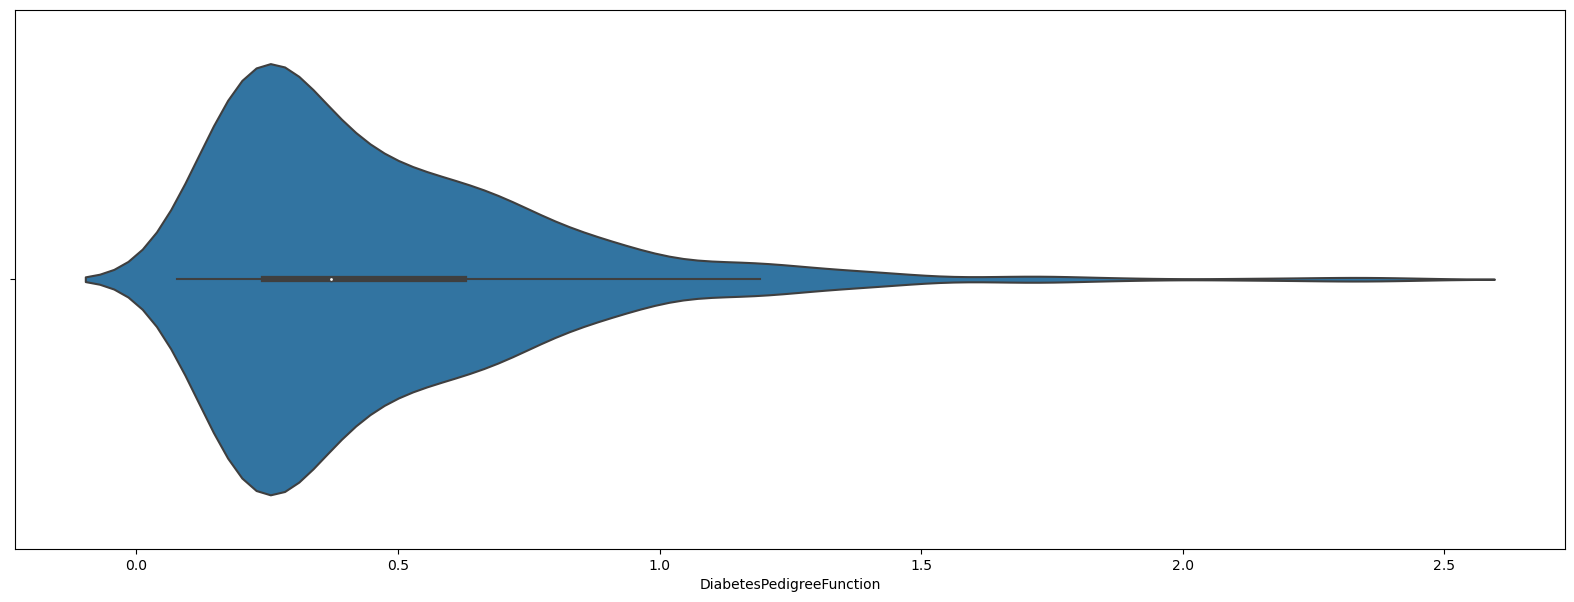

In [28]:
#Analysis of Diabetes Pedigree Function
fig11, ax11 = plt.subplots(1, 2, figsize=(20, 7))
fig12, ax12 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="DiabetesPedigreeFunction", kde=True, ax=ax11[0])
sns.boxplot(data=df, x="DiabetesPedigreeFunction", ax=ax11[1])

sns.violinplot(data=df, x="DiabetesPedigreeFunction", ax=ax12)

plt.show()

In [29]:
print("Median of DiabetesPedigreeFunction: ", df["DiabetesPedigreeFunction"].median())
print("Maximum of DiabetesPedigreeFunction: ", df["DiabetesPedigreeFunction"].max())
print("Mean of DiabetesPedigreeFunction: ", df["DiabetesPedigreeFunction"].mean())

Median of DiabetesPedigreeFunction:  0.3725
Maximum of DiabetesPedigreeFunction:  2.42
Mean of DiabetesPedigreeFunction:  0.47187630208333325


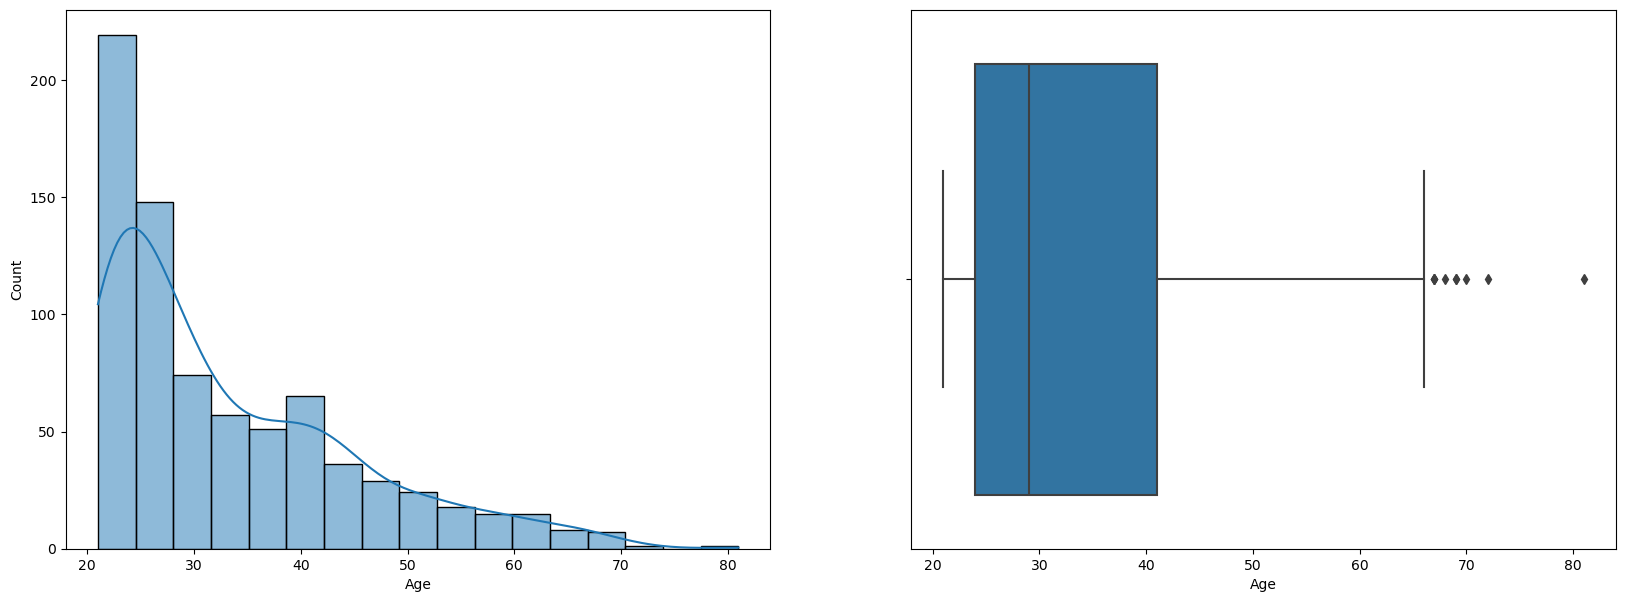

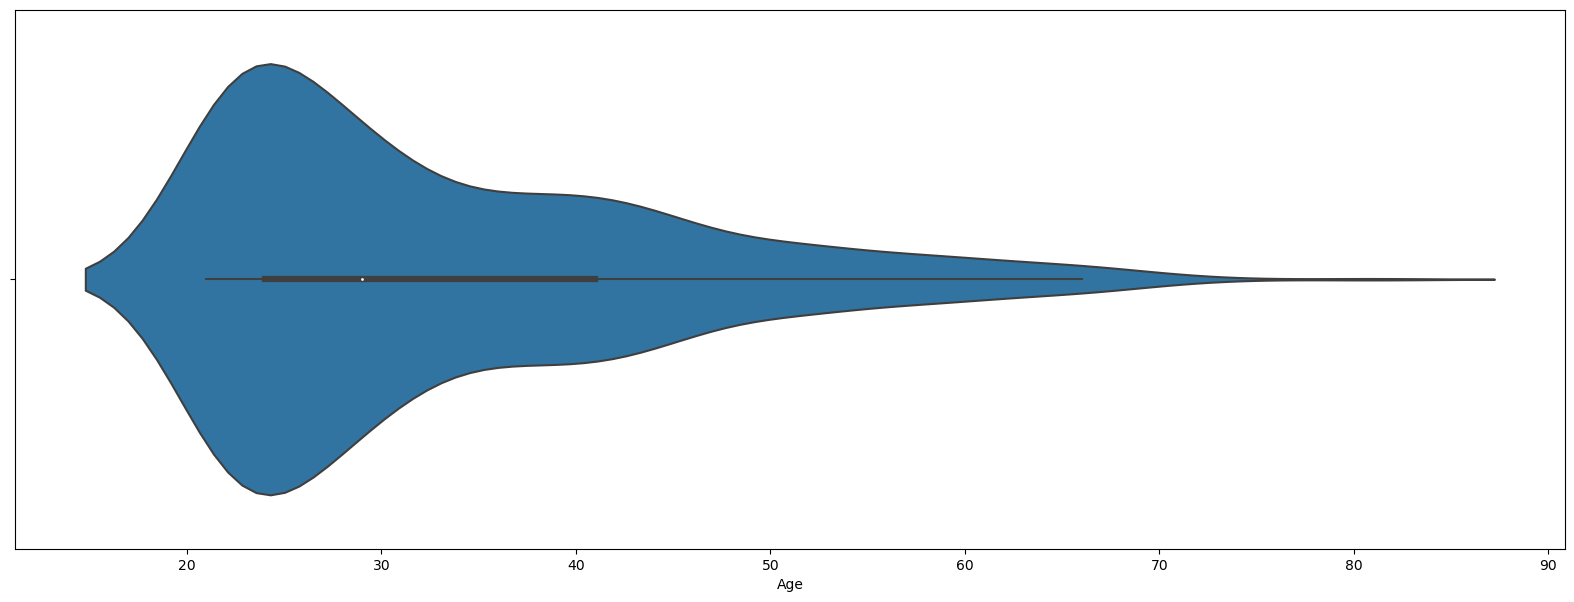

In [30]:
#Analysis of Age
fig13, ax13 = plt.subplots(1, 2, figsize=(20, 7))
fig14, ax14 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="Age", kde=True, ax=ax13[0])
sns.boxplot(data=df, x="Age", ax=ax13[1])

sns.violinplot(data=df, x="Age", ax=ax14)

plt.show()

In [31]:
print("Median of Age: ", df["Age"].median())
print("Maximum of Age: ", df["Age"].max())
print("Mean of Age: ", df["Age"].mean())

Median of Age:  29.0
Maximum of Age:  81
Mean of Age:  33.240885416666664


### Analysis each futuers with Outcome

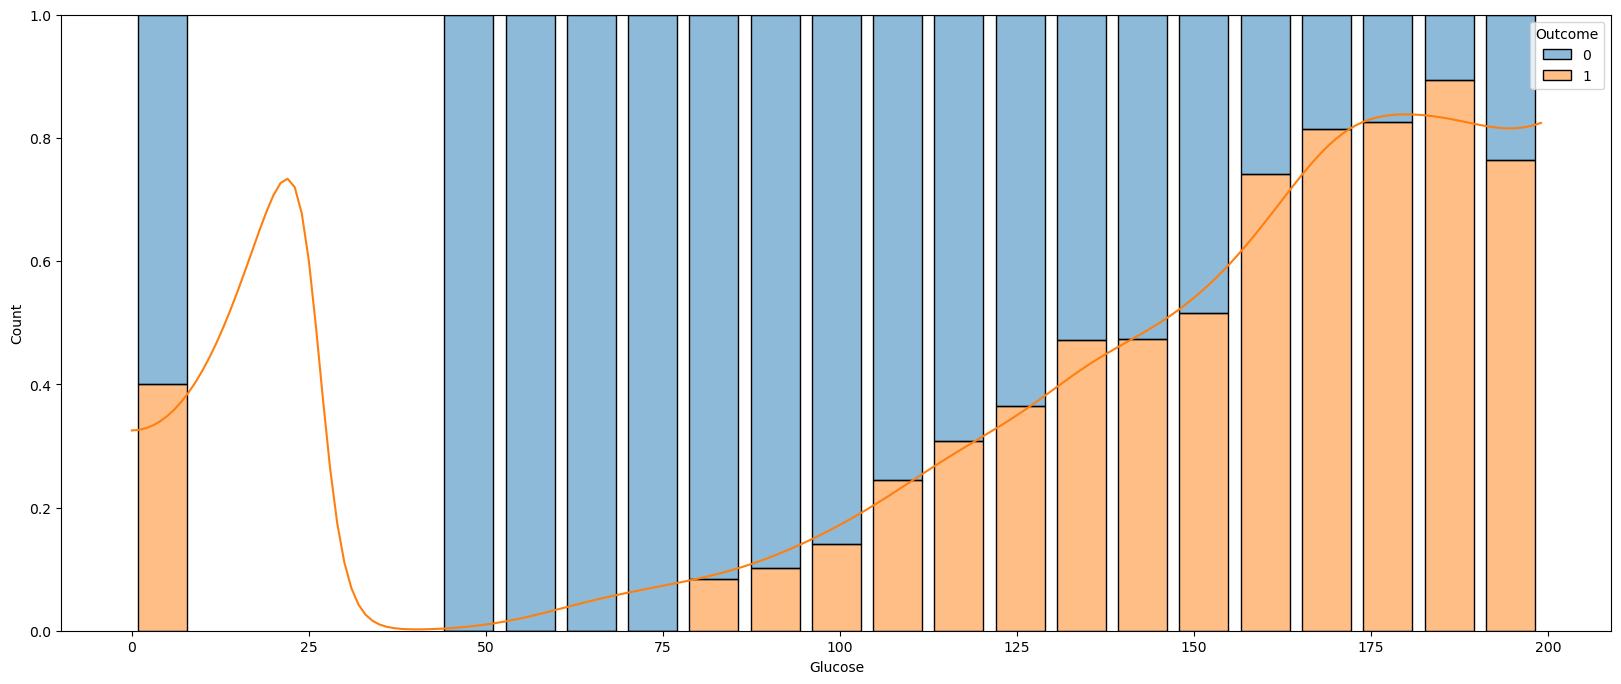

In [32]:
#Analysis of Glucose and Outcome
fig15, ax15 = plt.subplots(figsize=(20, 8))

sns.histplot(data=df, x="Glucose", hue="Outcome", shrink=0.8, multiple="fill", kde=True, ax=ax15)
plt.show()

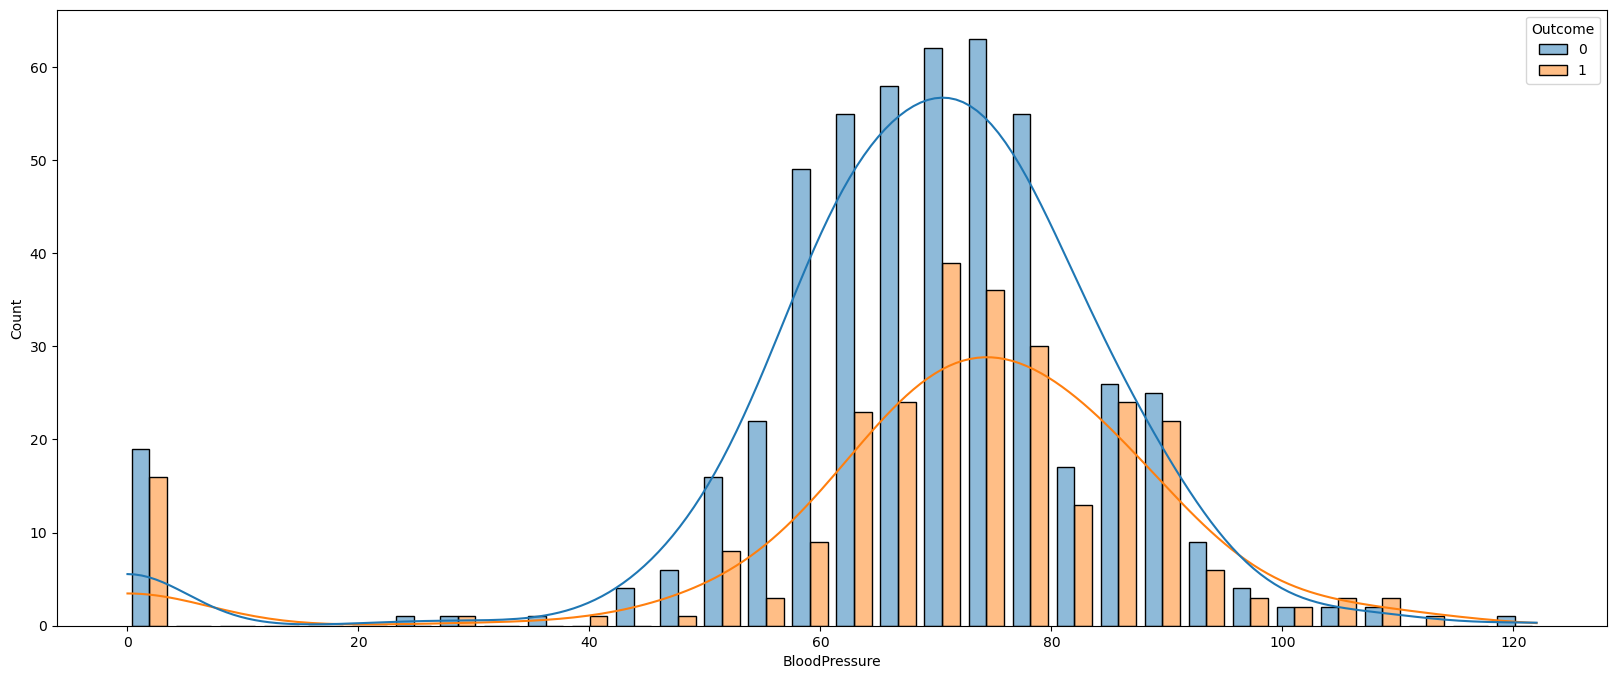

In [33]:
#Analysis of BloodPressure and Outcome
fig16, ax16 = plt.subplots(figsize=(20, 8))

sns.histplot(data=df, x="BloodPressure", hue="Outcome", shrink=0.8, multiple="dodge", kde=True, ax=ax16)
plt.show()

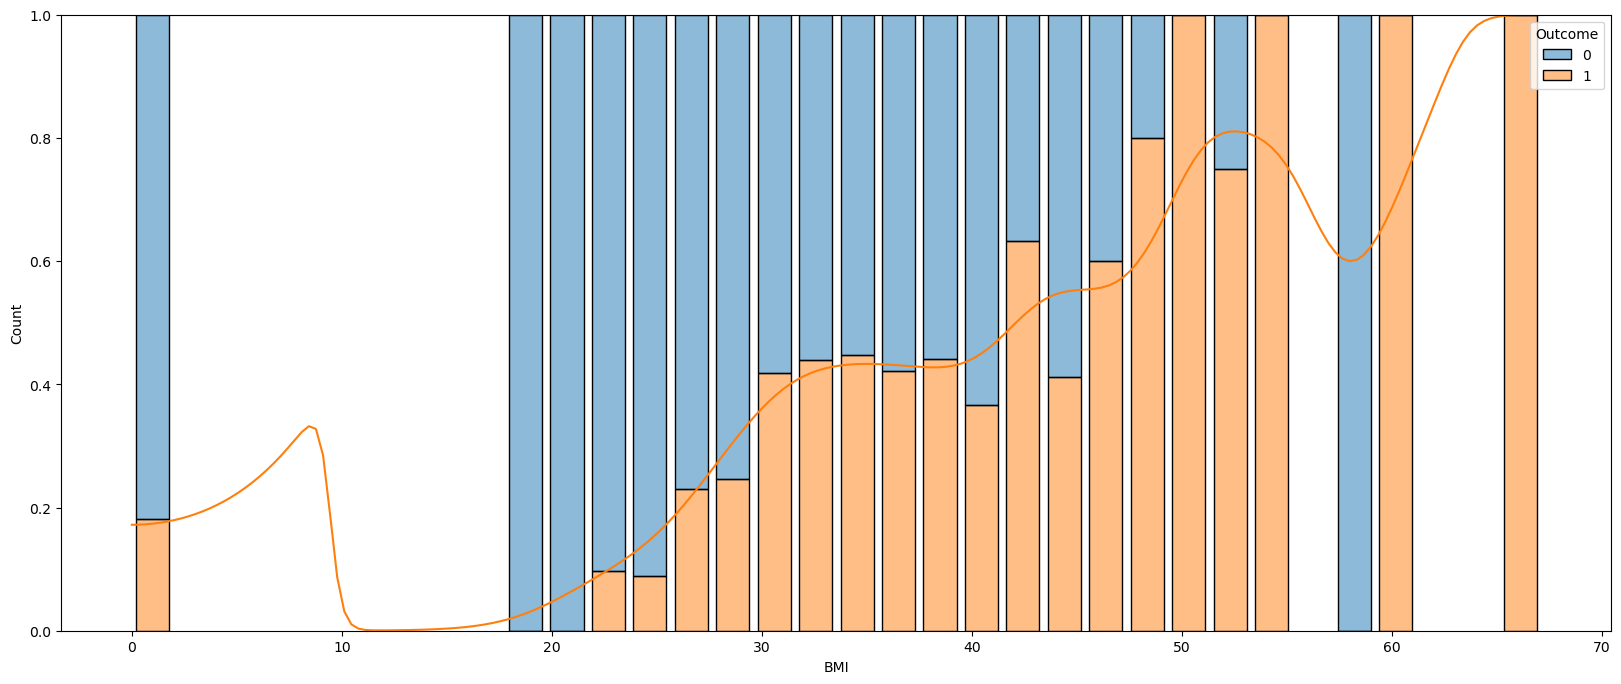

In [34]:
#Analysis of BMI and Outcome
fig17, ax17 = plt.subplots(figsize=(20, 8))

sns.histplot(data=df, x="BMI", hue="Outcome", shrink=0.8, multiple="fill", kde=True, ax=ax17)
plt.show()

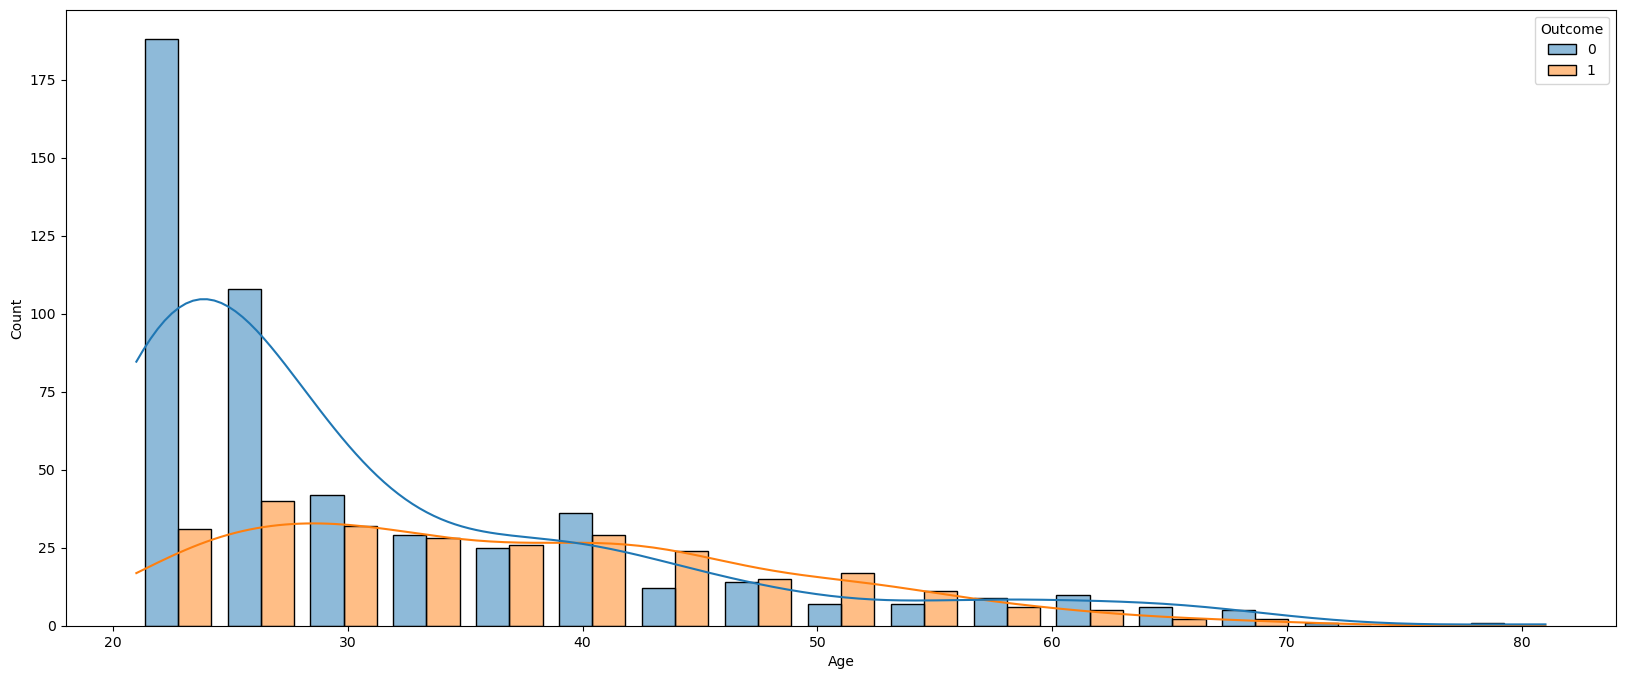

In [35]:
#Analysis of Age and Outcome
fig18, ax18 = plt.subplots(figsize=(20, 8))

sns.histplot(data=df, x="Age", hue="Outcome", shrink=0.8, multiple="dodge", kde=True, ax=ax18)
plt.show()

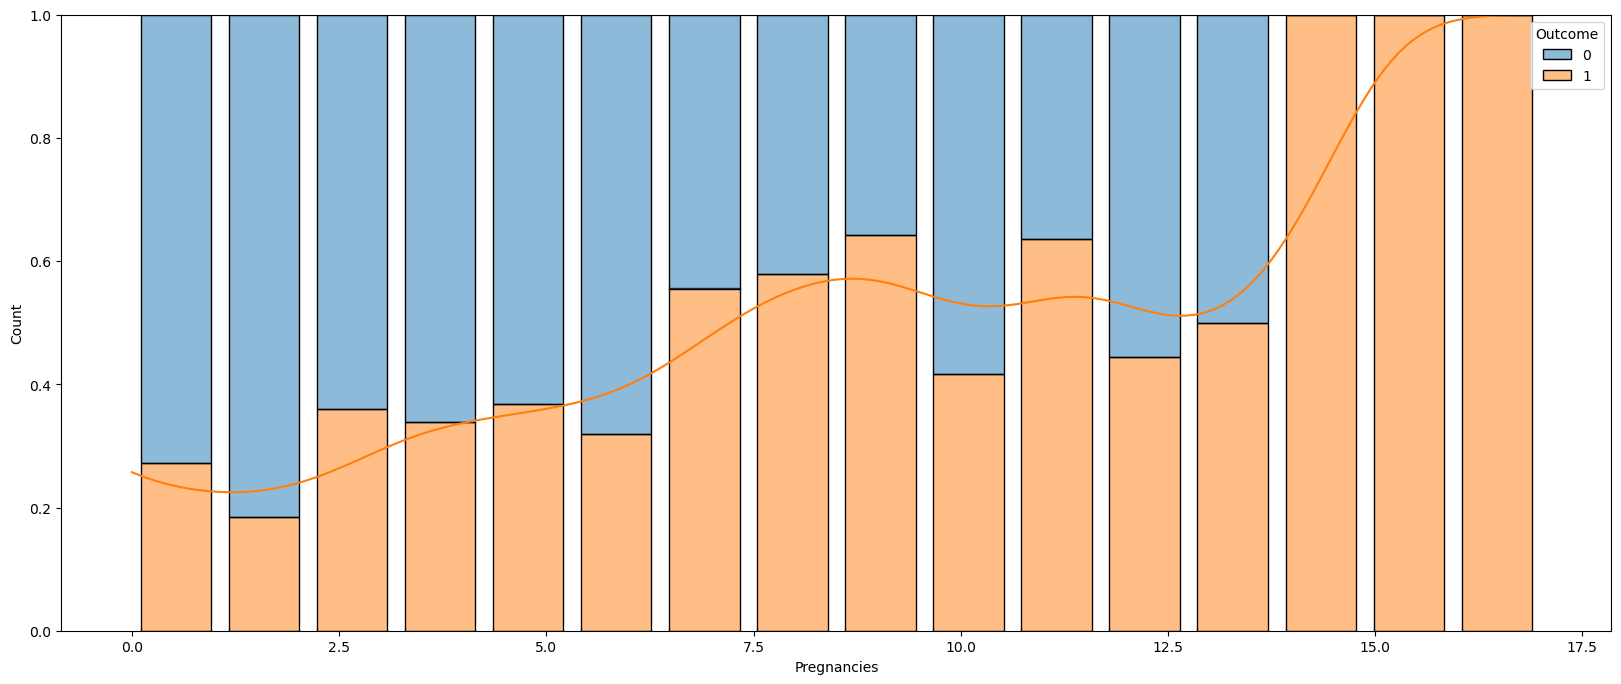

In [36]:
#Analysis of Pregnancies and Outcome
fig19, ax19 = plt.subplots(figsize=(20, 8))

sns.histplot(data=df, x="Pregnancies", hue="Outcome", shrink=0.8, multiple="fill", kde=True, ax=ax19)
plt.show()

# Analyzing Correlations

<Axes: >

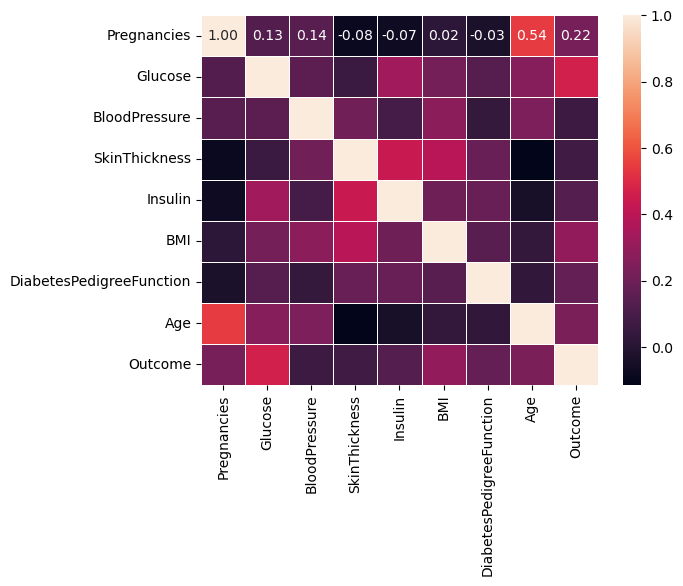

In [37]:
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=.5)

In [38]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# Splitting Data

In [39]:
X=df.drop(columns=["Outcome"],axis=1)

In [40]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [41]:
Y=df[["Outcome"]]

In [42]:
Y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [43]:
X_train, X_test, Y_train ,Y_test = train_test_split(X,Y, test_size=0.2, random_state=15)

# Machine Learning Models 

## function to call any models 

In [57]:
columns=['AdaBoost','LogisticRegression','RandomForest']
accuracy_s=[]
recall_s=[]
f1_s=[]

In [58]:
def call(model):
    model.fit(X_train, Y_train)
    pre = model.predict(X_test)
    
    accuracy = accuracy_score(Y_test, pre)
    recall = recall_score(Y_test, pre)
    f1 = f1_score(Y_test, pre)
    
    accuracy_s.append(accuracy)
    recall_s.append(recall)
    f1_s.append(f1)
    
    sns.heatmap(confusion_matrix(Y_test, pre), annot=True)
    print("accuracy is: ", accuracy, "recall is: ", recall, "f1 is: ", f1)

### AdaBoost

In [59]:
model_1=AdaBoostClassifier()

accuracy is:  0.7272727272727273 recall is:  0.5434782608695652 f1 is:  0.5434782608695652


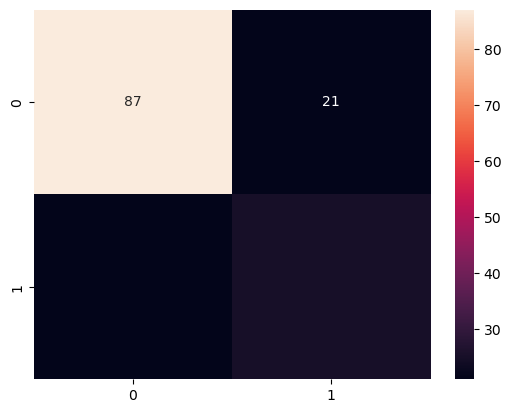

In [60]:
call(model_1)

## LogisticRegression

In [61]:
model_2=LogisticRegression()

accuracy is:  0.7467532467532467 recall is:  0.5652173913043478 f1 is:  0.5714285714285713


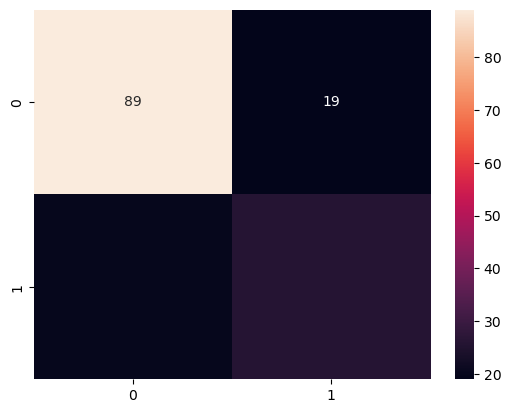

In [62]:
call(model_2)

In [63]:
model_3=RandomForestClassifier()

accuracy is:  0.7402597402597403 recall is:  0.5869565217391305 f1 is:  0.5744680851063831


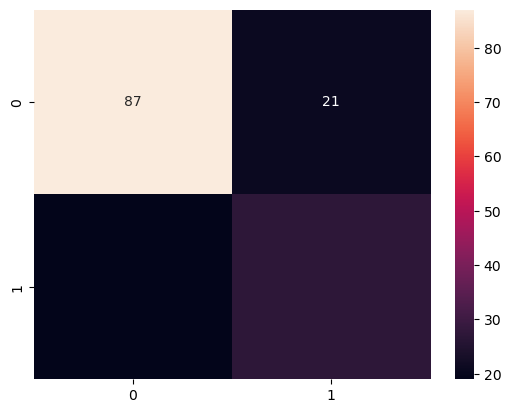

In [64]:
call(model_3)

In [66]:
final_r=pd.DataFrame({"Algorithm" :columns,"Accuracies" :accuracy_s,"Recall" :recall_s,"F1" :f1_s})

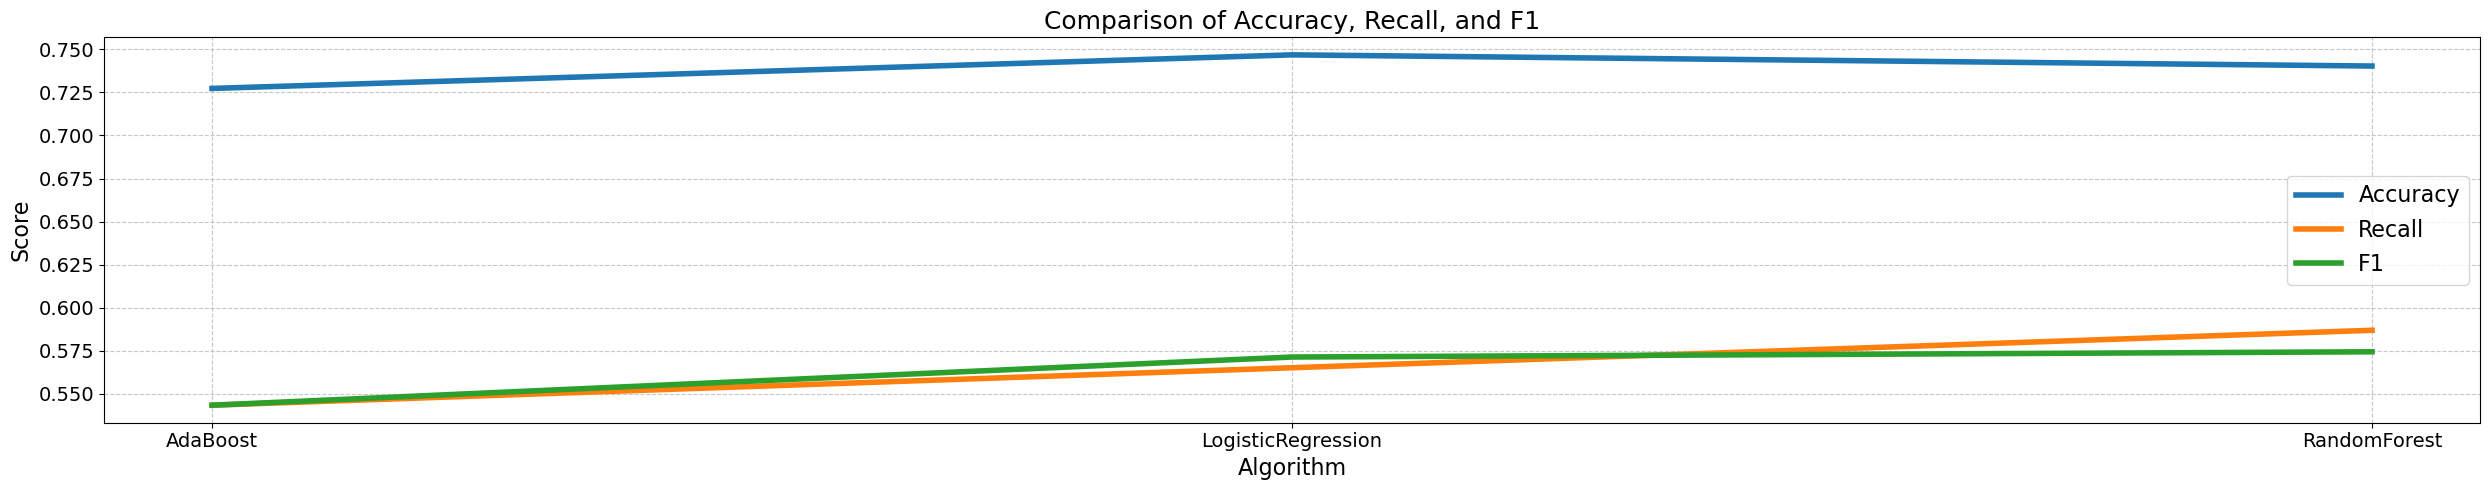

In [79]:
fig, ax = plt.subplots(figsize=(25, 5))

# زيادة سمك الخطوط
plt.plot(final_r.Algorithm, accuracy_s, label="Accuracy", linewidth=4)
plt.plot(final_r.Algorithm, recall_s, label="Recall", linewidth=4)
plt.plot(final_r.Algorithm, f1_s, label="F1", linewidth=4)

plt.title("Comparison of Accuracy, Recall, and F1", fontsize=18)
plt.xlabel("Algorithm", fontsize=16)
plt.ylabel("Score", fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(fontsize=16)

plt.tight_layout()
plt.show()

In [80]:
# saving model
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model_2, file)

# Analysis for people who may develop a disease

In [96]:
no_disease=df[df.Outcome==0]

In [97]:
no_disease

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [98]:
poss_disease=no_disease.drop(columns=["Outcome"],axis=1)

In [99]:
poss_disease

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1,1,85,66,29,0,26.6,0.351,31
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
7,10,115,0,0,0,35.3,0.134,29
10,4,110,92,0,0,37.6,0.191,30
...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30


In [100]:
Y_pred=model_2.predict(poss_disease)

In [101]:
Y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

In [102]:
poss_disease["possibil disease"]=Y_pred

In [105]:
may_develop_adisease=poss_disease[poss_disease["possibil disease"]==1]
may_develop_adisease

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,possibil disease
7,10,115,0,0,0,35.3,0.134,29,1
12,10,139,80,0,0,27.1,1.441,57,1
30,5,109,75,26,0,36.0,0.546,60,1
36,11,138,76,0,0,33.2,0.420,35,1
40,3,180,64,25,70,34.0,0.271,26,1
...,...,...,...,...,...,...,...,...,...
673,3,123,100,35,240,57.3,0.880,22,1
692,2,121,70,32,95,39.1,0.886,23,1
699,4,118,70,0,0,44.5,0.904,26,1
703,2,129,0,0,0,38.5,0.304,41,1


In [ ]:
# may_develop_adisease.to_csv('may_develop_adisease.csv', index=False)